# Topics - Easy Topic Modeling in Python #

This notebook introduces a workflow using the text mining technique **Topic Modeling**. The Python library [**gensim**](http://radimrehurek.com/gensim/), an open-source vector space modeling and topic modeling toolkit, offers one reliable way to compute the abstract topics of a collection of documents using [LDA](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation), a generative statistical model. 

Some parts of the following code is heavily inspired by the [gensim tutorial](https://radimrehurek.com/gensim/tutorial.html).

First of all you have to import topics.py:

In [1]:
import topics as tp

To make sure the necessary libraries [NumPy](http://www.numpy.org), [matplotlib](http://matplotlib.org) and gensim are installed, simply run the following code:

In [2]:
tp.testing()

NumPy 1.11.0 
matplotlib 1.5.1 
gensim 0.12.4


In case you get NumPy v1.11.0, matplotlib v1.5.1 and gensim v0.12.4, everything works fine.

Have a look at your previously downloaded repository **Topics**, especially the file **topics.py**, which contains the actual magic. From reading your corpus, preprocessing single documents to finally creating the model.

Tell Jupyter to draw figures within the browser:

In [3]:
%matplotlib inline

Let's start reading text files from a folder. The folder **corpus** within **Topics** contains a collection of short stories saved as [plain text](https://en.wikipedi.org/wiki/Plain_text). If you have your own collection, feel free to set the variable `folder` to the respective path and replace `./corpus/`, e. g. `folder = '/users/mycollection/*.txt'`. **Important**: Every file has to be saved as plain text.

In the next line, `tp.readCorpus` is reading and saving every single .txt file in a list. 

In [4]:
folder = './corpus/*.txt'
documents = tp.readCorpus(folder)

Store the file names as document labels in a separate list.

In [5]:
doc_labels = tp.docLabels(folder)
doc_labels

['Doyle_AScandalinBohemia',
 'Doyle_AStudyinScarlet',
 'Doyle_TheHoundoftheBaskervilles',
 'Doyle_TheSignoftheFour',
 'Howard_GodsoftheNorth',
 'Howard_SchadowsinZamboula',
 'Howard_ShadowsintheMoonlight',
 'Howard_TheDevilinIron',
 'Kipling_TheEndofthePassage',
 'Kipling_TheJungleBook',
 'Kipling_ThyServantaDog',
 'Lovecraft_AttheMountainofMadness',
 'Lovecraft_TheShunnedHouse',
 'Poe_EurekaAProsePoem',
 'Poe_TheCaskofAmontillado',
 'Poe_TheMasqueoftheRedDeath',
 'Poe_ThePurloinedLetter']

### Preprocessing ###

Tokenization, also called word segmentation, is the process of finding word boundaries - in its simplest form, by using the blanks in-between words as delimiters. This is exactly what you do now with your documents.

In [6]:
texts = tp.tokenize(documents)

Remove hapax legomena. A hapax legomenon is a single word that occurs only once in a text.

In [7]:
texts = tp.removeHapaxLeg(texts)

Remove stopwords. Stopwords might occure a thousand times in one document but will not be considered because of its semantic unimportance. Feel free to have a look at the stopwords lists in the folder **stopwords** within **helpful_stuff**.

Before removing stopwords, make sure the parameter `stoplist` is set correctly to either 'en', 'de', 'es' or 'fr'.

In [8]:
texts = tp.removeStopWords(texts, stoplist = 'en')

### Model creation ###

So far, create the model (but this may take a while):

In [9]:
from gensim import corpora, models
# Specify number of topics
no_of_topics = 10
# Generate dictionary object
dictionary = corpora.Dictionary(texts)
# Generate corpus object
corpus = [dictionary.doc2bow(text) for text in texts]
# Generate model object
model = models.LdaModel(corpus,
    id2word = dictionary,
    num_topics = no_of_topics,
    passes = 10
    )

In [10]:
topic_labels = tp.topicLabels(model, no_of_topics)

In [11]:
model.show_topics(num_topics = 5)

[(4,
  '0.031*s + 0.030*said + 0.024*man + 0.016*t + 0.013*holmes + 0.013*little + 0.011*time + 0.011*come + 0.011*face + 0.010*way'),
 (6,
  '0.013*said + 0.012*s + 0.010*man + 0.005*little + 0.005*time + 0.005*come + 0.005*way + 0.005*did + 0.005*night + 0.005*like'),
 (9,
  '0.039*s + 0.033*door + 0.029*house + 0.020*like + 0.019*street + 0.017*did + 0.015*black + 0.013*man + 0.013*hand + 0.013*chamber'),
 (8,
  '0.030*s + 0.020*great + 0.018*point + 0.018*course + 0.017*let + 0.017*say + 0.017*matter + 0.014*old + 0.014*time + 0.013*general'),
 (2,
  '0.021*holmes + 0.015*said + 0.010*man + 0.009*photograph + 0.009*s + 0.008*street + 0.008*room + 0.008*know + 0.008*majesty + 0.007*king')]

Save gensim output.

In [12]:
tp.saveGensimModel(model, corpus, dictionary, no_of_topics, doc_labels)

saving ...



### The document-topic matrix ###
Create a doc-topic matrix from the gensim objects.

In [13]:
doc_topic = tp.gensim_to_dtm(model, corpus, no_of_topics)

### Document-topic heatmap ###

Finally you can visualize our saved model as a heatmap.

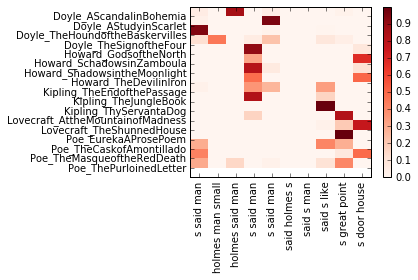

In [14]:
tp.docTopHeatmap(doc_topic, doc_labels, topic_labels)